In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir(r'/content/drive/MyDrive/Landslide_data')

In [ ]:
single = r"TestData/img/image_200.h5"
single_mask = r"TrainData/mask/mask_1001.h5"

ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


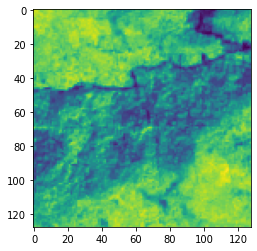

In [ ]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])

    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


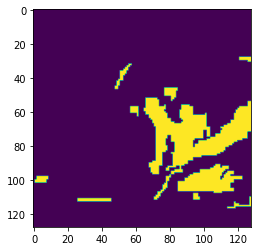

In [ ]:
with h5py.File(single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [ ]:
path_single = r"TrainData/img/image_10.h5"
path_single_mask = r'TrainData/mask/mask_1.h5'
TRAIN_PATH = r"TrainData/img/*.h5"
TRAIN_MASK = r'TrainData/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        data[np.isnan(data)] = 0.000001

        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0


        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb
        TRAIN_XX[i, :, :, 3] = data_ndvi
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation


    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data


0 TrainData/img/image_1.h5 TrainData/mask/mask_1.h5
1 TrainData/img/image_10.h5 TrainData/mask/mask_10.h5
2 TrainData/img/image_100.h5 TrainData/mask/mask_100.h5
3 TrainData/img/image_1000.h5 TrainData/mask/mask_1000.h5
4 TrainData/img/image_1001.h5 TrainData/mask/mask_1001.h5
5 TrainData/img/image_1002.h5 TrainData/mask/mask_1002.h5
6 TrainData/img/image_1003.h5 TrainData/mask/mask_1003.h5
7 TrainData/img/image_1004.h5 TrainData/mask/mask_1004.h5
8 TrainData/img/image_1005.h5 TrainData/mask/mask_1005.h5
9 TrainData/img/image_1006.h5 TrainData/mask/mask_1006.h5
10 TrainData/img/image_1007.h5 TrainData/mask/mask_1007.h5
11 TrainData/img/image_1008.h5 TrainData/mask/mask_1008.h5
12 TrainData/img/image_1009.h5 TrainData/mask/mask_1009.h5
13 TrainData/img/image_101.h5 TrainData/mask/mask_101.h5
14 TrainData/img/image_1010.h5 TrainData/mask/mask_1010.h5
15 TrainData/img/image_1011.h5 TrainData/mask/mask_1011.h5
16 TrainData/img/image_1012.h5 TrainData/mask/mask_1012.h5
17 TrainData/img/imag

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


1671 TrainData/img/image_2502.h5 TrainData/mask/mask_577.h5
1672 TrainData/img/image_2503.h5 TrainData/mask/mask_578.h5
1673 TrainData/img/image_2504.h5 TrainData/mask/mask_579.h5
1674 TrainData/img/image_2505.h5 TrainData/mask/mask_58.h5
1675 TrainData/img/image_2506.h5 TrainData/mask/mask_580.h5
1676 TrainData/img/image_2507.h5 TrainData/mask/mask_581.h5
1677 TrainData/img/image_2508.h5 TrainData/mask/mask_582.h5
1678 TrainData/img/image_2509.h5 TrainData/mask/mask_583.h5
1679 TrainData/img/image_251.h5 TrainData/mask/mask_584.h5
1680 TrainData/img/image_2510.h5 TrainData/mask/mask_585.h5
1681 TrainData/img/image_2511.h5 TrainData/mask/mask_586.h5
1682 TrainData/img/image_2512.h5 TrainData/mask/mask_587.h5
1683 TrainData/img/image_2513.h5 TrainData/mask/mask_588.h5
1684 TrainData/img/image_2514.h5 TrainData/mask/mask_589.h5
1685 TrainData/img/image_2515.h5 TrainData/mask/mask_59.h5
1686 TrainData/img/image_2516.h5 TrainData/mask/mask_590.h5
1687 TrainData/img/image_2517.h5 TrainData/

In [ ]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


In [ ]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

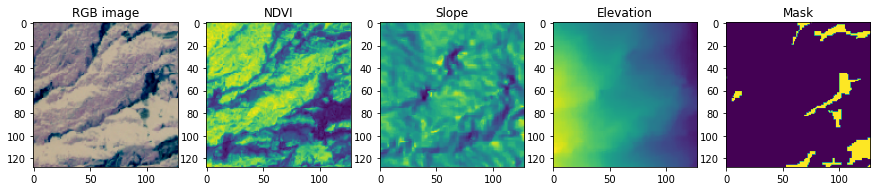

In [ ]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

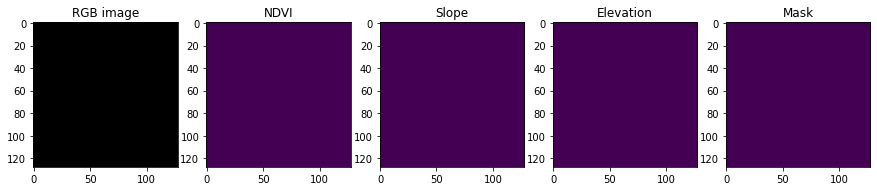

In [ ]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [ ]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [ ]:
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

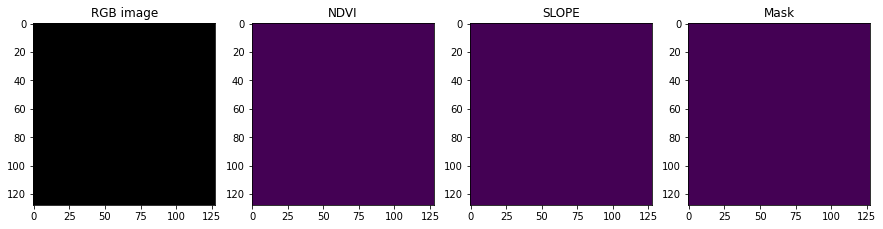

In [ ]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [ ]:
from utils import recall_m, precision_m, f1_m
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))


    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)


    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

In [ ]:
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,
          epochs=10,
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.h5")

Epoch 1/10

Epoch 1: val_f1_m improved from -inf to 0.00000, saving model to best_model.h5
190/190 - 642s - loss: 0.0947 - accuracy: 0.9832 - f1_m: 5.8649e-04 - precision_m: 0.0014 - recall_m: 0.0024 - val_loss: 0.0674 - val_accuracy: 0.9831 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - 642s/epoch - 3s/step
Epoch 2/10

Epoch 2: val_f1_m did not improve from 0.00000
190/190 - 613s - loss: 0.0559 - accuracy: 0.9849 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.0625 - val_accuracy: 0.9831 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - 613s/epoch - 3s/step
Epoch 3/10

Epoch 3: val_f1_m did not improve from 0.00000
190/190 - 604s - loss: 0.0539 - accuracy: 0.9849 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.0639 - val_accuracy: 0.9831 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - 604s/epoch - 3s/step
Epoch 4/10

E

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.06177808344364166 0.9837192893028259 0.3576686680316925 0.5031382441520691 0.29613324999809265


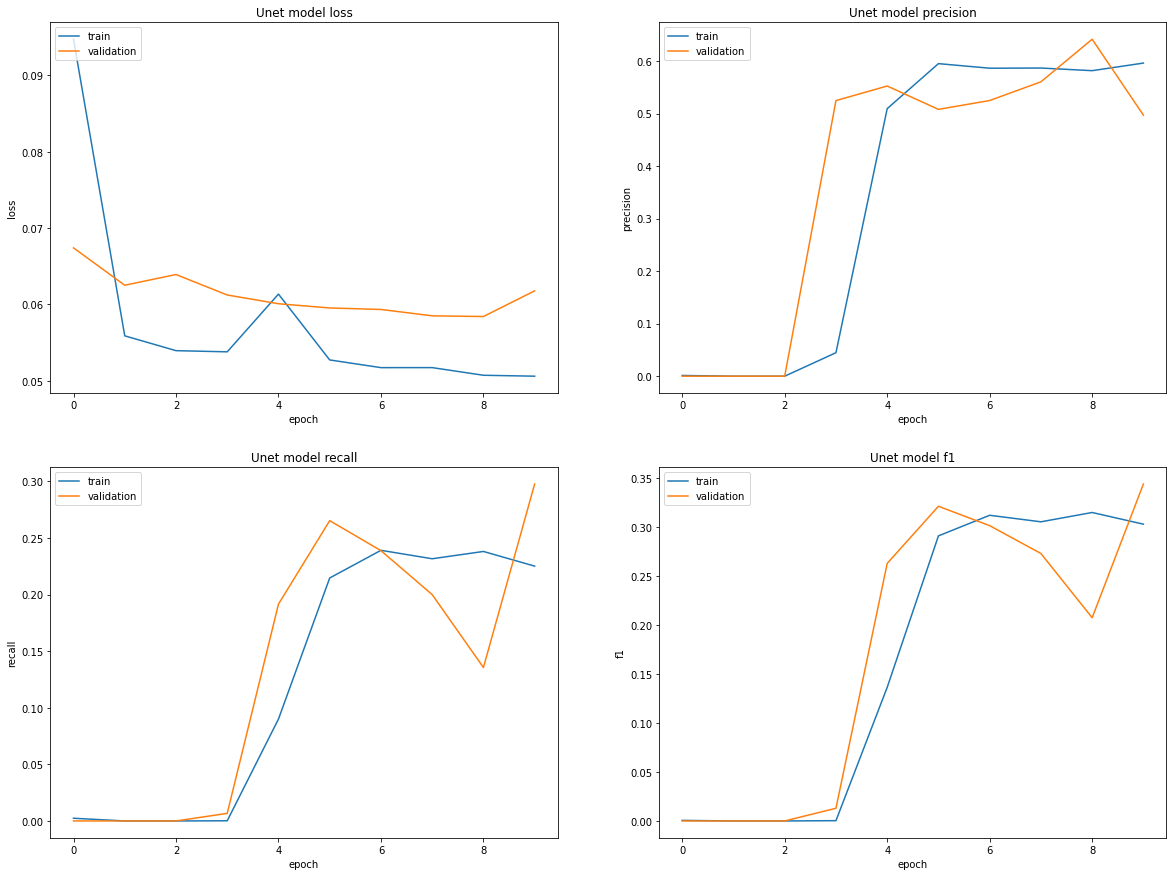

In [ ]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

In [ ]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 [==============================] - 33s 1s/step


Text(0.5, 1.0, 'Training Image')

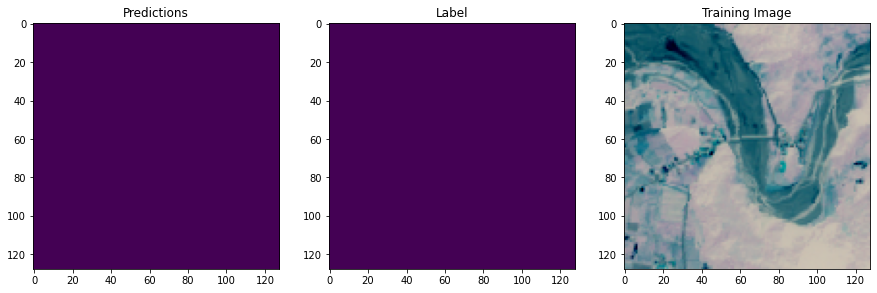

In [ ]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

In [ ]:
validation_url = r'/content/drive/MyDrive/Landslide_data/ValidData/img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 /content/drive/MyDrive/Landslide_data/ValidData/img/image_1.h5
1 /content/drive/MyDrive/Landslide_data/ValidData/img/image_10.h5
2 /content/drive/MyDrive/Landslide_data/ValidData/img/image_100.h5
3 /content/drive/MyDrive/Landslide_data/ValidData/img/image_101.h5
4 /content/drive/MyDrive/Landslide_data/ValidData/img/image_102.h5
5 /content/drive/MyDrive/Landslide_data/ValidData/img/image_103.h5
6 /content/drive/MyDrive/Landslide_data/ValidData/img/image_104.h5
7 /content/drive/MyDrive/Landslide_data/ValidData/img/image_105.h5
8 /content/drive/MyDrive/Landslide_data/ValidData/img/image_106.h5
9 /content/drive/MyDrive/Landslide_data/ValidData/img/image_107.h5
10 /content/drive/MyDrive/Landslide_data/ValidData/img/image_108.h5
11 /content/drive/MyDrive/Landslide_data/ValidData/img/image_109.h5
12 /content/drive/MyDrive/Landslide_data/ValidData/img/image_11.h5
13 /content/drive/MyDrive/Landslide_data/ValidData/img/image_110.h5
14 /content/drive/MyDrive/Landslide_data/ValidData/img/image_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


163 /content/drive/MyDrive/Landslide_data/ValidData/img/image_25.h5
164 /content/drive/MyDrive/Landslide_data/ValidData/img/image_26.h5
165 /content/drive/MyDrive/Landslide_data/ValidData/img/image_27.h5
166 /content/drive/MyDrive/Landslide_data/ValidData/img/image_28.h5
167 /content/drive/MyDrive/Landslide_data/ValidData/img/image_29.h5
168 /content/drive/MyDrive/Landslide_data/ValidData/img/image_3.h5
169 /content/drive/MyDrive/Landslide_data/ValidData/img/image_30.h5
170 /content/drive/MyDrive/Landslide_data/ValidData/img/image_31.h5
171 /content/drive/MyDrive/Landslide_data/ValidData/img/image_32.h5
172 /content/drive/MyDrive/Landslide_data/ValidData/img/image_33.h5
173 /content/drive/MyDrive/Landslide_data/ValidData/img/image_34.h5
174 /content/drive/MyDrive/Landslide_data/ValidData/img/image_35.h5
175 /content/drive/MyDrive/Landslide_data/ValidData/img/image_36.h5
176 /content/drive/MyDrive/Landslide_data/ValidData/img/image_37.h5
177 /content/drive/MyDrive/Landslide_data/ValidDa

In [ ]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 [==============================] - 12s 2s/step


(245, 128, 128, 1)

Text(0.5, 1.0, 'Training Image')

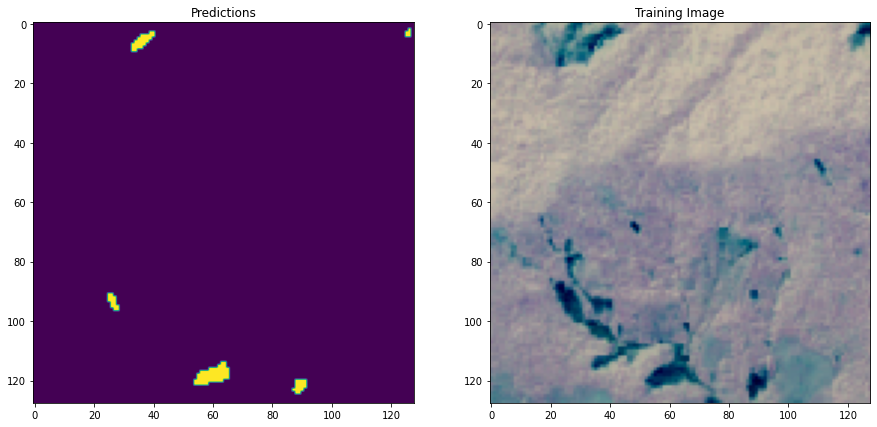

In [ ]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')